# 8. Нейронной сети 2

In [1]:
import torch

In [2]:
from setup_libs import *

In [3]:
from torch.nn import Sequential, Linear, LogSoftmax, Sigmoid, Flatten, Softmax, ReLU

# 8.1 Задача бинарной классификации

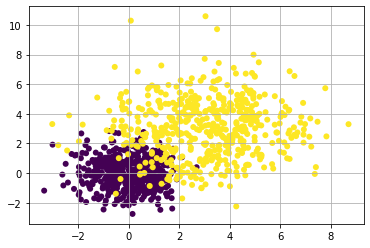

In [47]:
# Generate some data
# Generate some data
X, y = get_clf_dataset(500)

Y = np.vstack([y, 1-y]).T #обратите внимание что двумерный
plt.scatter(X[:,0],X[:,1], c = Y[:,0], edgecolors= 'none')
plt.grid()

In [48]:
t_X = torch.FloatTensor(X)
t_y = torch.FloatTensor(Y[:,0]).unsqueeze(-1)

In [49]:
t_y.size()

torch.Size([1000, 1])

## Sigmoid and BCELoss (Binary Cross Entropy)
* [BCELoss](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html)
* [Sigmoid](https://pytorch.org/docs/stable/generated/torch.sigmoid.html)

In [54]:
model = Sequential(
    Linear(2, 1),
    Sigmoid() # сигмоида
)

# Обозначили лосс
criterion = torch.nn.BCELoss()

# Выбрали алгоритм оптимизации
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

# Спуск
for t in range(2000):
    y_pred = model(t_X)
    loss = criterion(y_pred, t_y)
    
    if t % 100 == 99:
        print(t, loss.item())
        
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()



99 0.4357619285583496
199 0.4183763265609741
299 0.40511250495910645
399 0.39457598328590393
499 0.3859270513057709
599 0.37863436341285706
699 0.3723470866680145
799 0.36682549118995667
899 0.3619007468223572
999 0.3574507534503937
1099 0.3533850312232971
1199 0.34963569045066833
1299 0.34615036845207214
1399 0.34288835525512695
1499 0.33981749415397644
1599 0.3369120657444
1699 0.3341509997844696
1799 0.33151763677597046
1899 0.3289976119995117
1999 0.3265792429447174


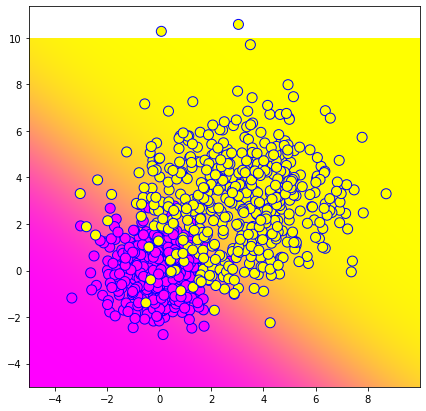

In [55]:
xx, yy = np.meshgrid(np.arange(-5, 10, .01), np.arange(-5, 10,.01))
input_field = np.c_[xx.ravel(), yy.ravel()]

predicted = model(torch.FloatTensor(input_field)).data.reshape(xx.shape)

# Отрисовка плоскости
plt.figure(figsize=(7, 7))
ax = plt.gca()
ax.pcolormesh(xx, yy, predicted, cmap='spring')

ax.scatter(X[:, 0], X[:, 1], c=Y[:,0], s=100, cmap='spring', edgecolors='b')

# 8.2 Многоклассовая классификация

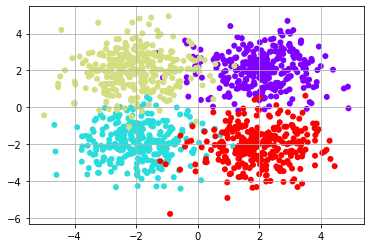

In [60]:
# Generate some data
N = 300

X1 = np.random.randn(N,2) + np.array([2,2])
X2 = np.random.randn(N,2) + np.array([-2,-2])
X3 = np.random.randn(N,2) + np.array([-2,2])
X4 = np.random.randn(N,2) + np.array([2,-2])

labels = np.concatenate([np.zeros(N),np.ones(N), 2 * np.ones(N), 3 * np.ones(N)]).astype(np.int64)

X = np.vstack([X1,X2,X3,X4])
plt.scatter(X[:,0],X[:,1], c = labels, cmap='rainbow', edgecolors= 'none')
plt.grid()

## CrossEntropy and SoftMax (NLLLoss + LogSoftMax)

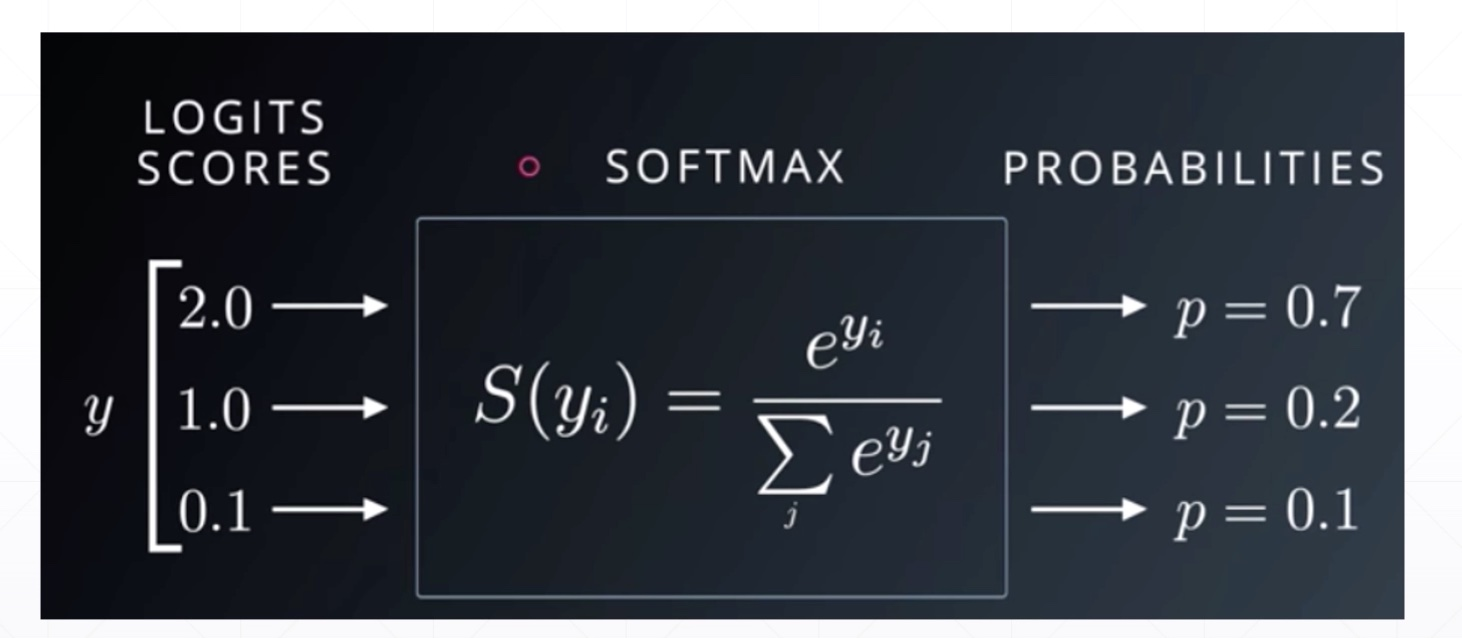

In [10]:
Image('images/softmax2.jpg', width=500)

$$ p_i = SoftMax(y_i) = \frac{e^{y_i}}{\sum_{i=j}e^{y_j}}$$

In [57]:
Softmax()(torch.tensor([1,2,3], dtype=float))

tensor([0.0900, 0.2447, 0.6652], dtype=torch.float64)

Пусть 
* $y_i^{real}$ - реальный класс $i$-го объекта, скаляр
* $p_i$ - вектор вероятностей каждого класса размера $C$ (кол-во классов)

Классы обозначаются числами $0, 1, \ldots, C-1$. Вероятность $k$-го класса $p_i^k$ находится на $k$-м месте $p_i[k]$.

Тогда кроссэнтропия для одного объекта будет считаться так:

$$CrossEntropy(p_i, y_i^{real}) = -\sum_{k=0}^{C-1}[y_i^{real} = k]\log{(p_i[k])}$$

где $[y_i^{real} = k]$ - индикатор, что индекс вектора совпадает с реальным классом.


В этой сумме будет только один ненулевой элемент, поэтому можно переписать как

$$CrossEntropy(p_i, y_i^{real}) = -\log{(p_i[y_i^{real}])}$$

$$p_i^k = \frac{e^{x_i[k]}}{\sum_{c = 0}^{C-1}e^{x_i[c]}}$$



[CrossEntropy](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html)


In [61]:
t_X = torch.FloatTensor(X)
t_y = torch.LongTensor(labels) # индексы

In [62]:
model = Sequential(
    Linear(2, 4),
    Linear(4, 4), 
)

# Обозначили лосс
criterion = torch.nn.CrossEntropyLoss()

# Выбрали алгоритм оптимизации
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)

# Спуск
for t in range(1000):
    # Нашли результат на текущей сети
    y_pred = model(t_X)
    # Посчитали ошибку
    loss = criterion(y_pred, t_y)
    if t % 100 == 99:
        print(t, loss.item())
    
    #Обнулили градиенты
    optimizer.zero_grad()

    # Посчитали градиенты
    loss.backward()

    # Пересчитываем веса
    optimizer.step()



99 0.42840468883514404
199 0.2819947898387909
299 0.22650229930877686
399 0.1981830596923828
499 0.18133436143398285
599 0.17032791674137115
699 0.16266879439353943
799 0.1570899784564972
899 0.15288349986076355
999 0.1496248096227646


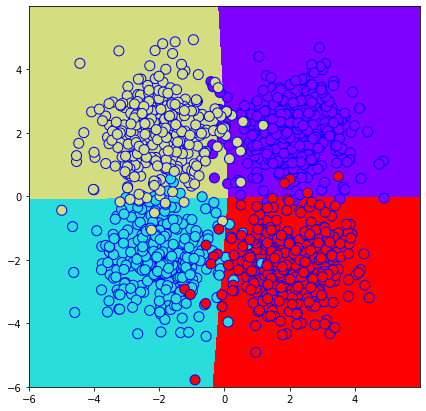

In [63]:
xx, yy = np.meshgrid(np.arange(-6, 6, .01), np.arange(-6, 6,.01))
input_field = np.c_[xx.ravel(), yy.ravel()]

result = model(torch.FloatTensor(input_field)).argmax(axis=1)

predicted = result.data.reshape(xx.shape)

# Отрисовка плоскости
plt.figure(figsize=(7, 7))
ax = plt.gca()
ax.pcolormesh(xx, yy, predicted, cmap='rainbow')

ax.scatter(X[:, 0], X[:, 1], c=labels, s=100, cmap='rainbow', edgecolors='b')

## LogSoftmax + NLLLoss

[NLL](https://pytorch.org/docs/stable/generated/torch.nn.NLLLoss.html)

$$ LogSoftMax(y_i) = log\Big(\frac{e^{y_i}}{\sum_{i=j}e^{z_j}}\Big) $$

$$NLL = -\sum_{i=1}^{n}\log(p_{real-class})$$

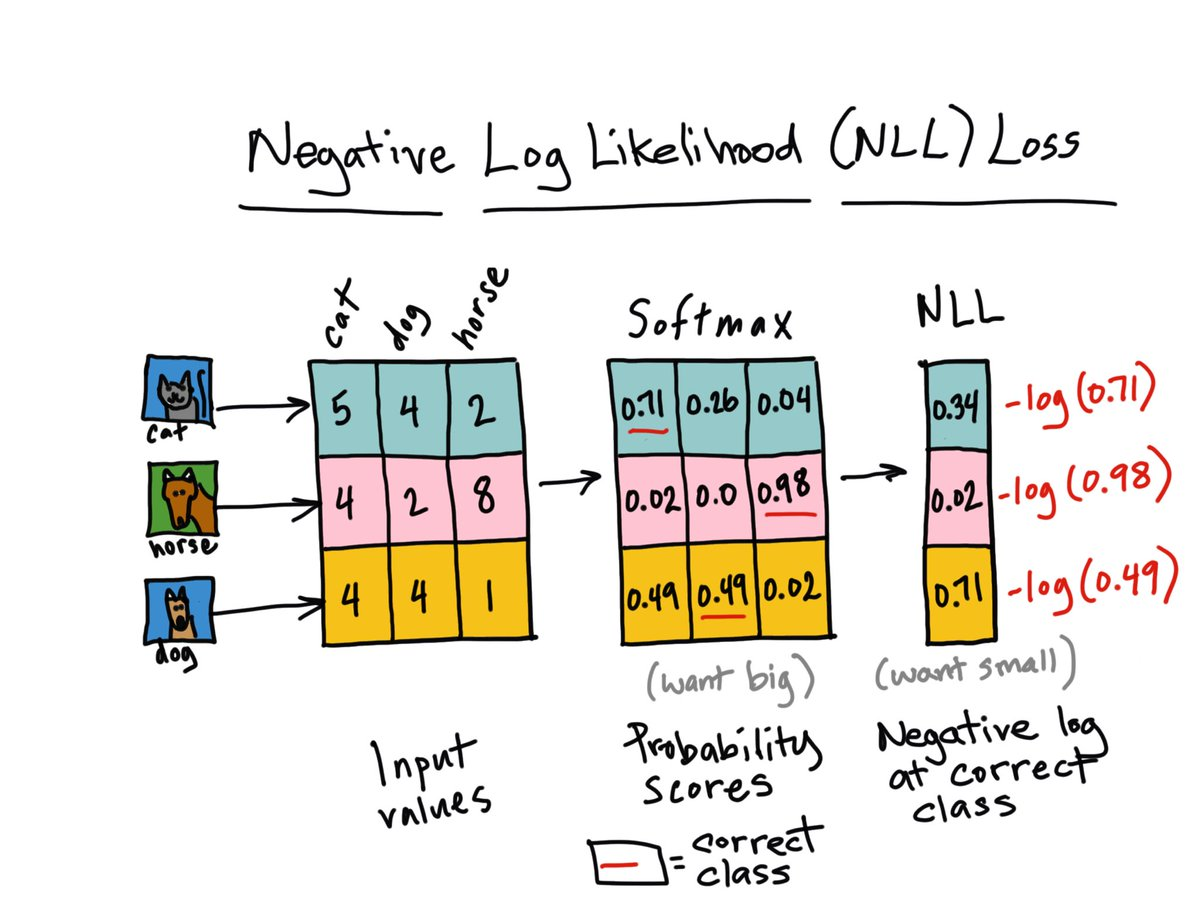

In [187]:
Image('images/nll.jpg', width=500)

In [64]:
model = Sequential(
    Linear(2, 4),
    LogSoftmax()
)

# Обозначили лосс
criterion = torch.nn.NLLLoss()

# Выбрали алгоритм оптимизации
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)

# Спуск
for t in range(1000):
    # Нашли результат на текущей сети
    y_pred = model(t_X)
    # Посчитали ошибку
    loss = criterion(y_pred, t_y)
    if t % 100 == 99:
        print(t, loss.item())
    
    #Обнулили градиенты
    optimizer.zero_grad()

    # Посчитали градиенты
    loss.backward()

    # Пересчитываем веса
    optimizer.step()


    

99 0.5375797748565674
199 0.38556697964668274
299 0.3208029270172119
399 0.2835686504840851
499 0.25898852944374084
599 0.24140717089176178
699 0.22814495861530304
799 0.21775169670581818
899 0.2093687802553177
999 0.20245304703712463


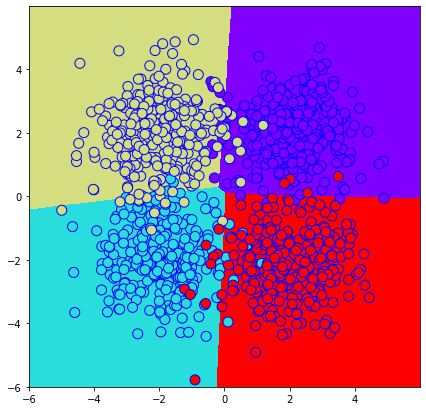

In [65]:
xx, yy = np.meshgrid(np.arange(-6, 6, .01), np.arange(-6, 6,.01))
input_field = np.c_[xx.ravel(), yy.ravel()]

result = model(torch.FloatTensor(input_field)).argmax(axis=1)

predicted = result.data.reshape(xx.shape)

# Отрисовка плоскости
plt.figure(figsize=(7, 7))
ax = plt.gca()
ax.pcolormesh(xx, yy, predicted, cmap='rainbow')

ax.scatter(X[:, 0], X[:, 1], c=labels, s=100, cmap='rainbow', edgecolors='b')

# 8.3 Зачем нужны активации

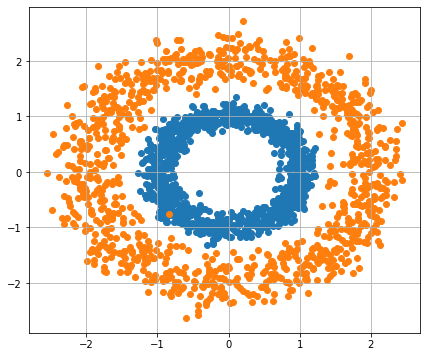

In [66]:
from random import gauss

num_samples = 1000
theta = np.linspace(0, 2*np.pi, num_samples)

r1 = 1
r2 = 2

rng = np.random.RandomState(1)

circle = np.hstack([np.cos(theta).reshape((-1, 1)) + (rng.randn(num_samples)[:,np.newaxis] / 8), 
                    np.sin(theta).reshape((-1, 1)) + (rng.randn(num_samples)[:,np.newaxis] / 8)])
lil = r1 * circle
big = r2 * circle
X = np.vstack([lil, big])
labels = np.hstack([np.zeros(num_samples), np.ones(num_samples)])

# plots
plt.figure(figsize=(7,6))
plt.scatter(lil[:,0],lil[:,1])
plt.scatter(big[:,0],big[:,1])
plt.grid()

In [67]:
t_X = torch.FloatTensor(X)
t_y = torch.LongTensor(labels) # индексы

In [85]:
from torch.nn import LeakyReLU

In [89]:
model = Sequential(
    Linear(2, 3),
    LeakyReLU(),
    Linear(3, 2),
    LogSoftmax(),
)

# Обозначили лосс
criterion = torch.nn.NLLLoss()

# Выбрали алгоритм оптимизации
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)

# Спуск
for t in range(1000):
    # Нашли результат на текущей сети
    y_pred = model(t_X)
    # Посчитали ошибку
    loss = criterion(y_pred, t_y)
    if t % 100 == 99:
        print(t, loss.item())
    
    #Обнулили градиенты
    optimizer.zero_grad()

    # Посчитали градиенты
    loss.backward()

    # Пересчитываем веса
    optimizer.step()



99 0.6044086217880249
199 0.5538750886917114
299 0.5142763257026672
399 0.35930582880973816
499 0.2494533807039261
599 0.1959494948387146
699 0.1642046719789505
799 0.14341919124126434
899 0.12870784103870392
999 0.117678202688694


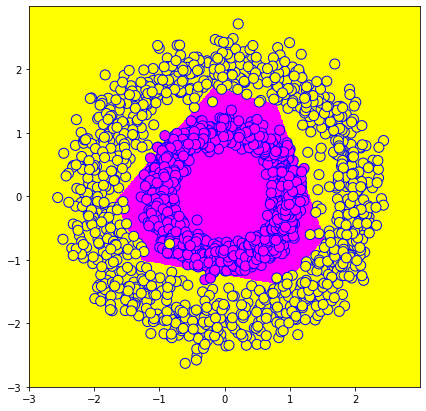

In [90]:
xx, yy = np.meshgrid(np.arange(-3, 3, .01), np.arange(-3, 3,.01))
input_field = np.c_[xx.ravel(), yy.ravel()]

result = model(torch.FloatTensor(input_field)).argmax(axis=1)

predicted = result.data.reshape(xx.shape)

# Отрисовка плоскости
plt.figure(figsize=(7, 7))
ax = plt.gca()
ax.pcolormesh(xx, yy, predicted, cmap='spring')

ax.scatter(X[:, 0], X[:, 1], c=labels, s=100, cmap='spring', edgecolors='b')

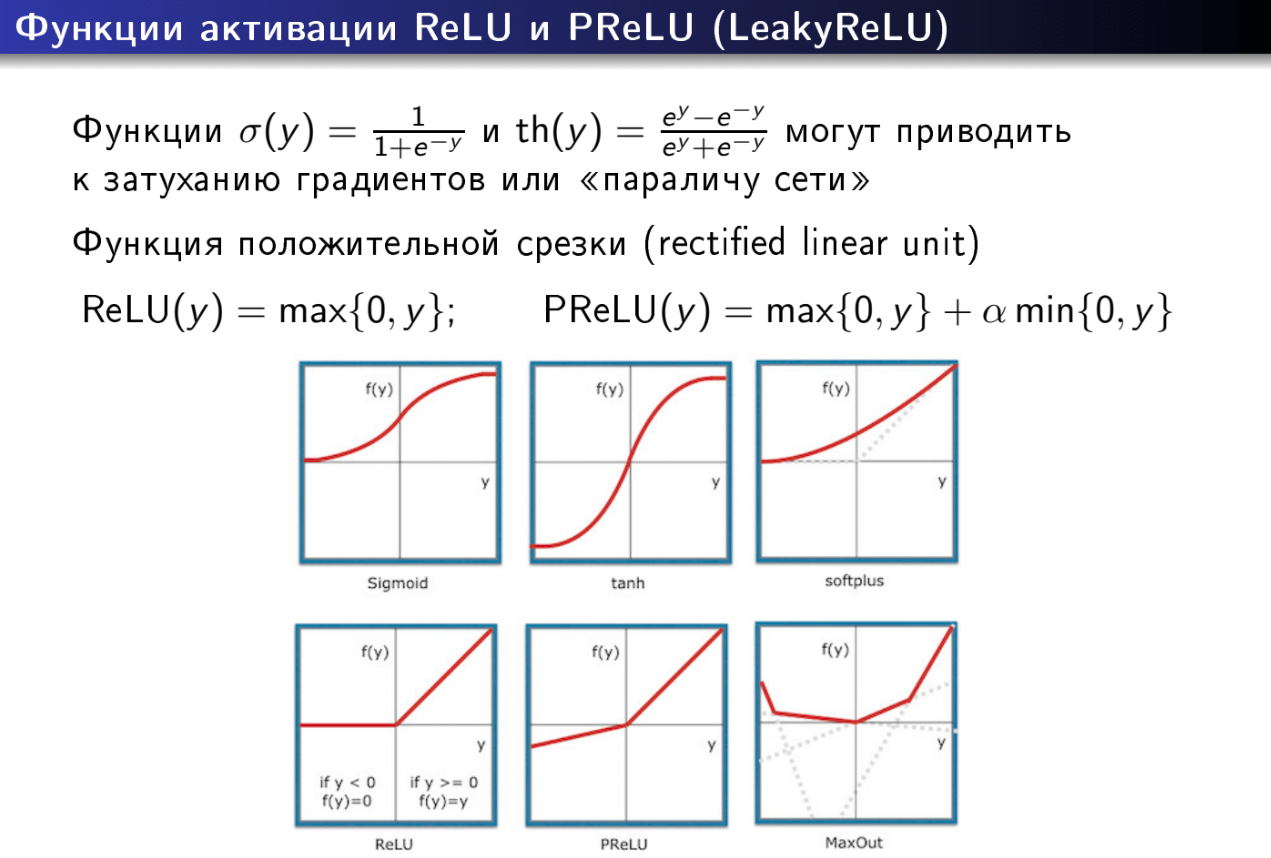

In [216]:
Image('images/activations.png', width=500)

# Ссылки
* [Softmax explanation](https://ljvmiranda921.github.io/notebook/2017/08/13/softmax-and-the-negative-log-likelihood/)
* [Multiclass classification](https://towardsdatascience.com/pytorch-tabular-multiclass-classification-9f8211a123ab)